In [23]:
%pip install pandas matplotlib seaborn yfinance


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

In [25]:
ticker = 'AAPL'
start_date = '2024-01-01'
end_date = '2025-11-11'

# fetch data 
data = yf.download(tickers=ticker,start=start_date,end=end_date)

data.reset_index(inplace=True)

# display data 
print(data.head())


/var/folders/b1/q44029jx1wbdmqw13ddfzf7m0000gn/T/ipykernel_41878/2659689109.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data = yf.download(tickers=ticker,start=start_date,end=end_date)
[*********************100%***********************]  1 of 1 completed

Price        Date       Close        High         Low        Open    Volume
Ticker                   AAPL        AAPL        AAPL        AAPL      AAPL
0      2024-01-02  183.903214  186.677021  182.169586  185.399081  82488700
1      2024-01-03  182.526230  184.140985  181.713894  182.496512  58414500
2      2024-01-04  180.208130  181.377083  179.187767  180.445875  71983600
3      2024-01-05  179.484940  181.050159  178.484394  180.287374  62379700
4      2024-01-08  183.823975  183.863609  179.801961  180.386437  59144500


In [26]:
# check info
print(data.info())
print(data.describe())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 467 entries, 0 to 466
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   (Date, )        467 non-null    datetime64[ns]
 1   (Close, AAPL)   467 non-null    float64       
 2   (High, AAPL)    467 non-null    float64       
 3   (Low, AAPL)     467 non-null    float64       
 4   (Open, AAPL)    467 non-null    float64       
 5   (Volume, AAPL)  467 non-null    int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 22.0 KB
None
Price                            Date       Close        High         Low  \
Ticker                                       AAPL        AAPL        AAPL   
count                             467  467.000000  467.000000  467.000000   
mean    2024-12-06 01:14:00.256959488  214.546201  216.616240  212.253548   
min               2024-01-02 00:00:00  163.664902  165.053568  162.752348   
25%               20

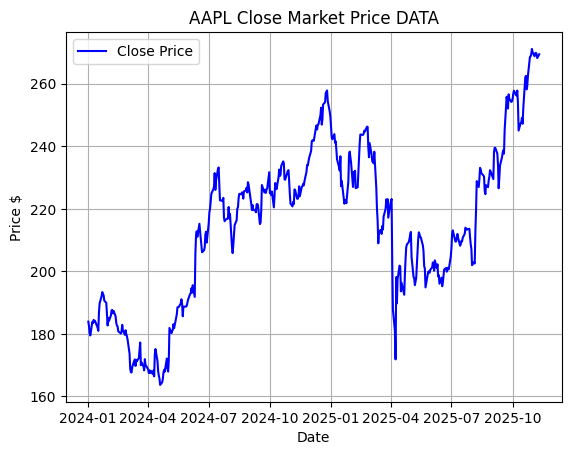

In [27]:
plt.Figure(figsize=(12,6))
plt.plot(data['Date'],data['Close'],label='Close Price',color='blue')
plt.title('AAPL Close Market Price DATA')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.grid(True)
plt.show()


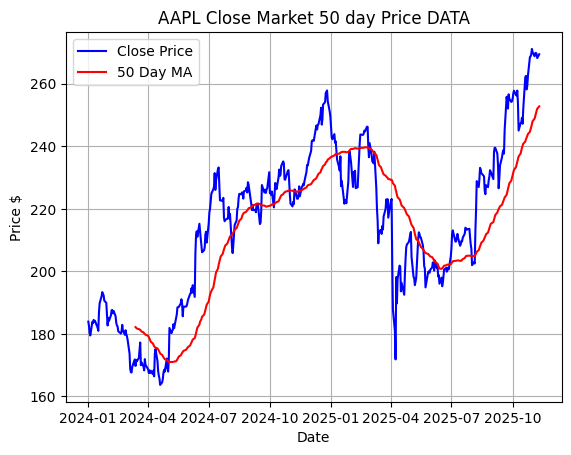

In [28]:
data['MA50'] = data['Close'].rolling(window=50).mean()

plt.plot(data['Date'],data['Close'],label='Close Price',color='blue')
plt.plot(data['Date'],data['MA50'],label='50 Day MA',color='red')

plt.title('AAPL Close Market 50 day Price DATA')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.grid(True)
plt.show()


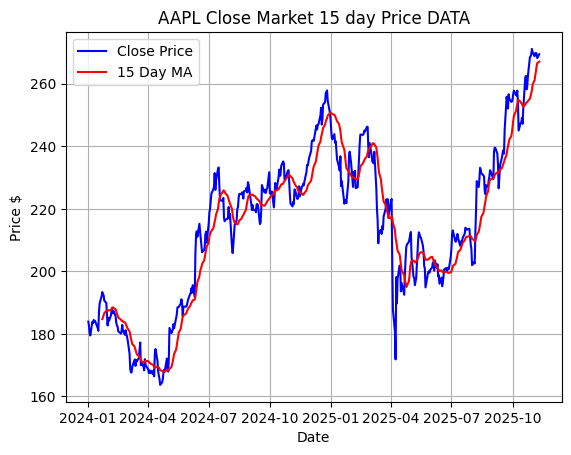

In [29]:
data['MA15'] = data['Close'].rolling(window=15).mean()

plt.plot(data['Date'],data['Close'],label='Close Price',color='blue')
plt.plot(data['Date'],data['MA15'],label='15 Day MA',color='red')

plt.title('AAPL Close Market 15 day Price DATA')
plt.xlabel('Date')
plt.ylabel('Price $')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Calculate RSI Using Pandas

# Step 7: Calculate 14-day RSI
def calculate_rsi(data, period=14):
    # Calculate daily price changes
    delta = data['Close'].diff()
    # Separate gains and losses
    gain = (delta.where(delta > 0, 0)).rolling(window=period).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=period).mean()
    # Calculate RS (Relative Strength)
    rs = gain / loss
    
    # Calculate RSI
    rsi = 100 - (100 / (1 + rs))
    
    return rsi

# Apply RSI
data['RSI_14'] = calculate_rsi(data, period=14)

# Display last few rows to verify
print(data[['Date', 'Close', 'RSI_14']].tail(10))

Price        Date       Close     RSI_14
Ticker                   AAPL           
457    2025-10-28  268.739471  61.176941
458    2025-10-29  269.438812  67.163566
459    2025-10-30  271.137146  83.891081
460    2025-10-31  270.108154  80.532453
461    2025-11-03  268.789429  77.708370
462    2025-11-04  269.778473  77.366510
463    2025-11-05  269.878387  81.487699
464    2025-11-06  269.508728  77.693301
465    2025-11-07  268.209991  63.596702
466    2025-11-10  269.429993  64.662820
